In [10]:
import os
import pymysql
import pymongo
import pandas as pd
from sqlalchemy import create_engine
from datetime import date

In [11]:
AJNA_CONSULTA=os.environ['SQL_URI']
engine = create_engine(AJNA_CONSULTA)


In [12]:
SQL = 'SELECT * FROM dbmercante.bagagens_dsi '
df_dsis = pd.read_sql(SQL, engine)

In [13]:
df_dsis.head()

,ID,numero,data_registro,consignatario,despachante,numeroCEmercante,descricao
0,1,2100045516,2021-06-08,15604969672,051702567-1,152105130386270,"TRATA-SE DE BENS PESSOAIS USADOS, TAIS COMO AR..."
1,2,2100044722,2021-06-04,52956970704,729391098-3,152105132654884,MERCADORIA ESPECIFICADA CONFORME RELACAO DE BE...
2,3,1300312820,2013-11-25,22085046827,058246928-7,151305236540389,"ITEM""QTDE.""UNID.""DESCRICAO - USADOS""VALOR R$ 1..."
3,4,1400007395,2014-01-10,59114282968,164391550-9,151305264236303,ITEM QUANT DESCRICAO¿ 1 1 TENIS¿ 2 10 COSMETIC...
4,5,2100049872,2021-06-29,31038489865,098050238-1,152105149386489,CONFORME LISTA DE BENS USADOS ANEXA


In [14]:
print(len(df_dsis))

10124


In [16]:
def regra_matematica_digito(digito: int, anterior: int):
    valor = (digito % 5) * 2
    if valor == 0:
        valor = 10
    return (anterior < valor) and (anterior > valor - 3)

def e_canal_vermelho(num_dsi: str, data_registro: date):
    if len(num_dsi) < 10:
        raise ValueError(f'Número de DSI {num_dsi} inválido!')
    dia_str = str(data_registro.day)
    final_dia = dia_str[-1:]
    digito_verificador = num_dsi[-1:]
    digito_anterior = num_dsi[-2:-1]
    # print(dia_str, digito_verificador, digito_anterior)
    if digito_verificador != final_dia:  # Regra 1 NÃO atendida
        return False
    return regra_matematica_digito(int(digito_verificador), int(digito_anterior))


def pseudo_random(row):
    num_dsi = row.numero
    data = row.data_registro
    return e_canal_vermelho(num_dsi, data)


df_selecionados = df_dsis.apply(pseudo_random, axis=1)
num_selecionados = sum(df_selecionados)
num_total = len(df_dsis)
print(f'{num_selecionados} selecionados de um total de {num_total} ({(num_selecionados/num_total)*100:0.2f}%)')
df_dsis[df_selecionados]
    
    

196 selecionados de um total de 10124 (1.94%)


,ID,numero,data_registro,consignatario,despachante,numeroCEmercante,descricao
73,74,2100048132,2021-06-22 00:00:00,88961125753,098050238-1,152105137699584,CONFORME LISTA DE BENS USADOS ANEXA
112,113,2100048353,2021-06-23 00:00:00,28942213391,042689859-1,212105136888208,OBJETOS DE USO PESSOAL E DOMESTICO CONFORME LI...
184,185,1300093532,2013-04-02 00:00:00,84428678720,052047448-1,151305034148054,"ITEM QTDE. DESCRICAO VALOR EM R$ 1."" ""1 BIOMBO..."
195,196,2100047527,2021-06-17 00:00:00,75565323800,092991788-0,152105141509433,ITENS USADOS DESCRITOS CONFORME LISTA DE BENS ...
262,263,2100032074,2021-04-14 00:00:00,98881205815,098050238-1,152105057339824,CONFORME A LISTA DE BENS USADOS.
...,...,...,...,...,...,...,...
9832,9977,2200058822,2022-09-02 10:20:44,71768600171,None,152205199798062,None
9845,9990,2200059195,2022-09-05 13:23:48,87090589749,None,152205196141666,None
9860,10005,2200059306,2022-09-06 11:03:13,30978233875,None,152205210590507,None
9947,10092,2200059969,2022-09-09 11:57:25,18550052809,None,152205211810500,None


In [17]:
# Simulação de Monte Carlo
simulacoes = []
num_total = len(df_dsis)
for counter in range(30):
    df_selecionados = df_dsis.apply(pseudo_random, axis=1)
    num_selecionados = sum(df_selecionados)
    simulacoes.append((num_selecionados/num_total)*100)
    

array([[<AxesSubplot:title={'center':'percentual'}>]], dtype=object)

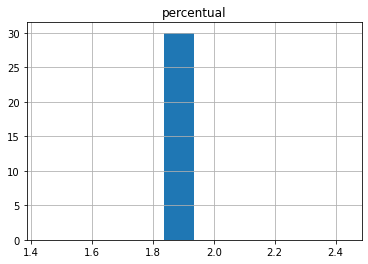

In [18]:
pd.DataFrame(simulacoes, columns=['percentual']).hist()

In [19]:
pd.DataFrame(simulacoes, columns=['percentual']).describe()

,percentual
count,3.000000e+01
mean,1.935994e+00
std,1.129203e-15
min,1.935994e+00
25%,1.935994e+00
50%,1.935994e+00
75%,1.935994e+00
max,1.935994e+00
